In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file_loc="Visadataset.csv"
visa_df=pd.read_csv("Visadataset.csv")
visa_df.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [3]:
visa_df.dtypes

case_id                   object
continent                 object
education_of_employee     object
has_job_experience        object
requires_job_training     object
no_of_employees            int64
yr_of_estab                int64
region_of_employment      object
prevailing_wage          float64
unit_of_wage              object
full_time_position        object
case_status               object
dtype: object

In [12]:
visa_df[['prevailing_wage']]
#cannot do much operations on this.

,prevailing_wage
0,592.2029
1,83425.6500
2,122996.8600
3,83434.0300
4,149907.3900
...,...
25475,77092.5700
25476,279174.7900
25477,146298.8500
25478,86154.7700


In [13]:
p_wage=visa_df['prevailing_wage']
p_wage

0           592.2029
1         83425.6500
2        122996.8600
3         83434.0300
4        149907.3900
            ...     
25475     77092.5700
25476    279174.7900
25477    146298.8500
25478     86154.7700
25479     70876.9100
Name: prevailing_wage, Length: 25480, dtype: float64

In [3]:
visa_df.select_dtypes(exclude="object").columns

Index(['no_of_employees', 'yr_of_estab', 'prevailing_wage'], dtype='object')

In [13]:
#creating a dataframe with count,max,min,mean ,median values of wage column.
wage_count=p_wage.count()
wage_max=round(p_wage.max(),2)
wage_min=round(p_wage.min(),2)
wage_mean=round(p_wage.mean(),2)
wage_median=round(p_wage.median(),2)

list_1=[wage_count,wage_max,wage_min,wage_mean,wage_median]
index_list=['wage_count','wage_max','wage_min','wage_mean','wage_median']
pd.DataFrame(list_1,columns=['prevailing_wage'],index=index_list)

,prevailing_wage
wage_count,25480.00
wage_max,319210.27
wage_min,2.14
wage_mean,74455.81
wage_median,70308.21


In [16]:
#general code for all numerical columns in the original DataFrame

num_cols=visa_df.select_dtypes(exclude="object").columns
dict1={}
for i in num_cols:
    count=visa_df[i].count()
    maxx=round(visa_df[i].max(),2)
    minn=round(visa_df[i].min(),2)
    mean=round(visa_df[i].mean(),2)
    median=round(visa_df[i].median(),2)
    list1=[count,maxx,minn,mean,median]
    dict1[i]=list1
index_list=['count','max','min','mean','median']
num_df=pd.DataFrame(dict1,index=index_list)
num_df.to_csv('num_df.csv')
num_df

,no_of_employees,yr_of_estab,prevailing_wage
count,25480.00,25480.00,25480.00
max,602069.00,2016.00,319210.27
min,-26.00,1800.00,2.14
mean,5667.04,1979.41,74455.81
median,2109.00,1997.00,70308.21


In [4]:
visa_df.describe()

,no_of_employees,yr_of_estab,prevailing_wage
count,25480.000000,25480.000000,25480.000000
mean,5667.043210,1979.409929,74455.814592
std,22877.928848,42.366929,52815.942327
min,-26.000000,1800.000000,2.136700
25%,1022.000000,1976.000000,34015.480000
50%,2109.000000,1997.000000,70308.210000
75%,3504.000000,2005.000000,107735.512500
max,602069.000000,2016.000000,319210.270000


In [9]:
#calculations using numpy package
np.mean(p_wage)
np.median(p_wage)
np.min(p_wage)
np.max(p_wage)
np.std(p_wage)

52814.90589711402

In [11]:
wage_25p=round(np.percentile(p_wage,25),2)
wage_25p

34015.48

In [12]:
qwage_25p=round(np.quantile(p_wage,0.25),2)
qwage_25p

34015.48

In [14]:
#using pandas
wage_count=p_wage.count()
wage_max=round(p_wage.max(),2)
wage_min=round(p_wage.min(),2)
wage_mean=round(p_wage.mean(),2)
wage_median=round(p_wage.median(),2)
wage_std=round(p_wage.std(),2)     #standard deviation using pandas
#using numpy

wage_25p=round(np.percentile(p_wage,25),2)
wage_50p=round(np.percentile(p_wage,50),2)
wage_75p=round(np.percentile(p_wage,75),2)

list_1=[wage_count,wage_max,wage_min,wage_mean,wage_median,wage_std,wage_25p,wage_50p,wage_75p]
index_list=['wage_count','wage_max','wage_min','wage_mean','wage_median','std','25%','50%','75%']
pd.DataFrame(list_1,columns=['prevailing_wage'],index=index_list)

,prevailing_wage
wage_count,25480.00
wage_max,319210.27
wage_min,2.14
wage_mean,74455.81
wage_median,70308.21
std,52815.94
25%,34015.48
50%,70308.21
75%,107735.51


In [15]:
#general code for all numerical columns in the original DataFrame

num_cols=visa_df.select_dtypes(exclude="object").columns
dict1={}
for i in num_cols:
    count=visa_df[i].count()
    maxx=round(visa_df[i].max(),2)
    minn=round(visa_df[i].min(),2)
    mean=round(visa_df[i].mean(),2)
    median=round(visa_df[i].median(),2)
    std=round(visa_df[i].std(),2)     #standard deviation using pandas
    
    p25=round(np.percentile(p_wage,25),2)
    p50=round(np.percentile(p_wage,50),2)
    p75=round(np.percentile(p_wage,75),2)
    
    
    list1=[count,maxx,minn,mean,median,std,p25,p50,p75]
    dict1[i]=list1
index_list=['count','max','min','mean','median','std','p25','p50','p75']
num_df=pd.DataFrame(dict1,index=index_list)
num_df.to_csv('num_df.csv')
num_df

,no_of_employees,yr_of_estab,prevailing_wage
count,25480.00,25480.00,25480.00
max,602069.00,2016.00,319210.27
min,-26.00,1800.00,2.14
mean,5667.04,1979.41,74455.81
median,2109.00,1997.00,70308.21
std,22877.93,42.37,52815.94
p25,34015.48,34015.48,34015.48
p50,70308.21,70308.21,70308.21
p75,107735.51,107735.51,107735.51


In [16]:
p_wage

0           592.2029
1         83425.6500
2        122996.8600
3         83434.0300
4        149907.3900
            ...     
25475     77092.5700
25476    279174.7900
25477    146298.8500
25478     86154.7700
25479     70876.9100
Name: prevailing_wage, Length: 25480, dtype: float64

In [17]:
#see notes
#say p_wage 25p  with 34015
#25% of total employees has wages below 34015
p_wage<34015

0         True
1        False
2        False
3        False
4        False
         ...  
25475    False
25476    False
25477    False
25478    False
25479    False
Name: prevailing_wage, Length: 25480, dtype: bool

In [18]:
p_wage[p_wage<34015]

0          592.2029
7          418.2298
12       28663.0500
16        3706.7900
17       16132.6100
            ...    
25461       54.9196
25465      481.2238
25466     6973.4000
25470      516.4101
25473    22845.5600
Name: prevailing_wage, Length: 6370, dtype: float64

In [19]:
len(p_wage[p_wage<34015])

6370

In [20]:
#avoiding hard coding of above statements

count_25p=len(p_wage[p_wage<np.percentile(p_wage,25)])
count_50p=len(p_wage[p_wage<np.percentile(p_wage,50)])
count_75p=len(p_wage[p_wage<np.percentile(p_wage,75)])


In [24]:
count_25p=len(p_wage[p_wage<np.percentile(p_wage,25)])
count_50p=len(p_wage[p_wage<np.percentile(p_wage,50)])
count_75p=len(p_wage[p_wage<np.percentile(p_wage,75)])

l1=['Count of 25%','Count of 50%','Count of 75%']
l2=[count_25p,count_50p,count_75p]
count_df=pd.DataFrame(l2,columns=["wages"],index=l1)
count_df

,wages
Count of 25%,6370
Count of 50%,12740
Count of 75%,19110


In [27]:
#Retrieving data based on conditions
#25 percentile 
p_25=np.percentile(p_wage,25)
con25=p_wage<p_25
visa_df[con25]



,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
7,EZYV08,North America,Bachelor's,Y,N,3035,1924,West,418.2298,Hour,Y,Denied
12,EZYV13,Asia,Bachelor's,Y,N,123876,1963,Northeast,28663.0500,Year,Y,Certified
16,EZYV17,Europe,Master's,Y,N,76638,1991,Midwest,3706.7900,Year,Y,Certified
17,EZYV18,Asia,Master's,Y,N,2747,2001,West,16132.6100,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25461,EZYV25462,Asia,Master's,Y,N,2861,2004,West,54.9196,Hour,Y,Denied
25465,EZYV25466,North America,High School,N,N,2577,1995,South,481.2238,Hour,Y,Certified
25466,EZYV25467,Europe,Bachelor's,Y,N,1938,2005,West,6973.4000,Year,Y,Denied
25470,EZYV25471,North America,Master's,Y,N,2272,1970,Northeast,516.4101,Hour,Y,Certified


In [28]:
#50 percentile 
p_50=np.percentile(p_wage,50)
con50=p_wage<p_50
visa_df[con50]

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
6,EZYV07,Asia,Bachelor's,N,N,4985,1994,South,53635.3900,Year,Y,Certified
7,EZYV08,North America,Bachelor's,Y,N,3035,1924,West,418.2298,Hour,Y,Denied
9,EZYV10,Europe,Doctorate,Y,N,2251,1995,South,67514.7600,Year,Y,Certified
12,EZYV13,Asia,Bachelor's,Y,N,123876,1963,Northeast,28663.0500,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25465,EZYV25466,North America,High School,N,N,2577,1995,South,481.2238,Hour,Y,Certified
25466,EZYV25467,Europe,Bachelor's,Y,N,1938,2005,West,6973.4000,Year,Y,Denied
25470,EZYV25471,North America,Master's,Y,N,2272,1970,Northeast,516.4101,Hour,Y,Certified
25473,EZYV25474,Asia,Bachelor's,Y,N,2421,2007,Northeast,22845.5600,Year,Y,Certified


In [30]:
#between 25p to 50p
con1=p_wage>p_25
con2=p_wage<p_50
visa_df[con1&con2]

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
6,EZYV07,Asia,Bachelor's,N,N,4985,1994,South,53635.39,Year,Y,Certified
9,EZYV10,Europe,Doctorate,Y,N,2251,1995,South,67514.76,Year,Y,Certified
22,EZYV23,Asia,Master's,Y,N,2878,1968,West,45642.39,Year,Y,Certified
28,EZYV29,Asia,Master's,Y,N,18,2004,Northeast,40925.86,Year,Y,Certified
38,EZYV39,Asia,Bachelor's,Y,Y,2206,1909,Northeast,50960.01,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25449,EZYV25450,Asia,Bachelor's,Y,N,3017,2000,West,39313.00,Year,Y,Certified
25454,EZYV25455,Asia,Bachelor's,N,N,1316,2007,South,62844.97,Year,Y,Denied
25456,EZYV25457,Asia,Bachelor's,Y,N,998,1996,South,67340.65,Year,Y,Certified
25459,EZYV25460,Asia,High School,Y,N,4727,1990,Midwest,53952.84,Year,Y,Denied


In [33]:
#lessthan 25p or more than 75p
con3 = p_wage<p_25
p_75=np.percentile(p_wage,75)
con4=p_wage>p_75
visa_df[con3|con4]

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
7,EZYV08,North America,Bachelor's,Y,N,3035,1924,West,418.2298,Hour,Y,Denied
12,EZYV13,Asia,Bachelor's,Y,N,123876,1963,Northeast,28663.0500,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25469,EZYV25470,North America,Master's,Y,N,2261,1997,Northeast,273772.4700,Year,N,Certified
25470,EZYV25471,North America,Master's,Y,N,2272,1970,Northeast,516.4101,Hour,Y,Certified
25473,EZYV25474,Asia,Bachelor's,Y,N,2421,2007,Northeast,22845.5600,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.7900,Year,Y,Certified


**Histograms**

(array([6038., 5504., 5681., 4551., 2334.,  624.,  373.,  240.,  114.,
          21.]),
 array([2.13670000e+00, 3.19229500e+04, 6.38437634e+04, 9.57645767e+04,
        1.27685390e+05, 1.59606203e+05, 1.91527017e+05, 2.23447830e+05,
        2.55368643e+05, 2.87289457e+05, 3.19210270e+05]),
 <BarContainer object of 10 artists>)

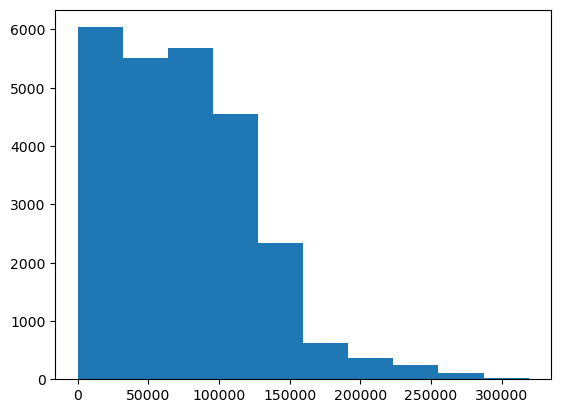

In [34]:
plt.hist(p_wage)

(array([2992.,  871., 1005., 1170., 1242., 1434., 1385., 1443., 1444.,
        1445., 1457., 1335., 1268., 1217., 1088.,  978.,  807.,  645.,
         509.,  373.,  264.,  144.,  105.,  111.,  107.,   99.,   88.,
          79.,   65.,   64.,   58.,   53.,   33.,   33.,   29.,   19.,
           7.,    3.,    6.,    5.]),
 array([2.13670000e+00, 7.98234003e+03, 1.59625434e+04, 2.39427467e+04,
        3.19229500e+04, 3.99031534e+04, 4.78833567e+04, 5.58635600e+04,
        6.38437634e+04, 7.18239667e+04, 7.98041700e+04, 8.77843734e+04,
        9.57645767e+04, 1.03744780e+05, 1.11724983e+05, 1.19705187e+05,
        1.27685390e+05, 1.35665593e+05, 1.43645797e+05, 1.51626000e+05,
        1.59606203e+05, 1.67586407e+05, 1.75566610e+05, 1.83546813e+05,
        1.91527017e+05, 1.99507220e+05, 2.07487423e+05, 2.15467627e+05,
        2.23447830e+05, 2.31428033e+05, 2.39408237e+05, 2.47388440e+05,
        2.55368643e+05, 2.63348847e+05, 2.71329050e+05, 2.79309253e+05,
        2.87289457e+05, 2.9526

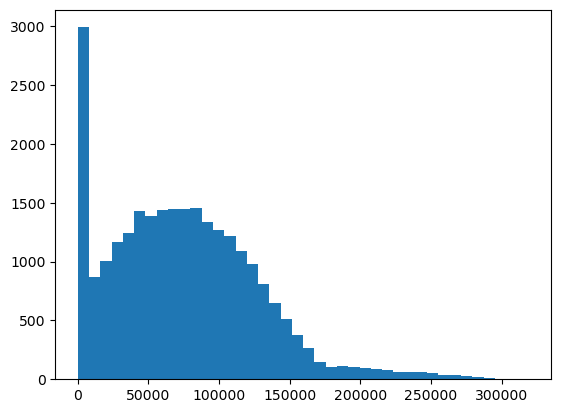

In [35]:
plt.hist(p_wage,bins=40)

(array([2992.,  871., 1005., 1170., 1242., 1434., 1385., 1443., 1444.,
        1445., 1457., 1335., 1268., 1217., 1088.,  978.,  807.,  645.,
         509.,  373.,  264.,  144.,  105.,  111.,  107.,   99.,   88.,
          79.,   65.,   64.,   58.,   53.,   33.,   33.,   29.,   19.,
           7.,    3.,    6.,    5.]),
 array([2.13670000e+00, 7.98234003e+03, 1.59625434e+04, 2.39427467e+04,
        3.19229500e+04, 3.99031534e+04, 4.78833567e+04, 5.58635600e+04,
        6.38437634e+04, 7.18239667e+04, 7.98041700e+04, 8.77843734e+04,
        9.57645767e+04, 1.03744780e+05, 1.11724983e+05, 1.19705187e+05,
        1.27685390e+05, 1.35665593e+05, 1.43645797e+05, 1.51626000e+05,
        1.59606203e+05, 1.67586407e+05, 1.75566610e+05, 1.83546813e+05,
        1.91527017e+05, 1.99507220e+05, 2.07487423e+05, 2.15467627e+05,
        2.23447830e+05, 2.31428033e+05, 2.39408237e+05, 2.47388440e+05,
        2.55368643e+05, 2.63348847e+05, 2.71329050e+05, 2.79309253e+05,
        2.87289457e+05, 2.9526

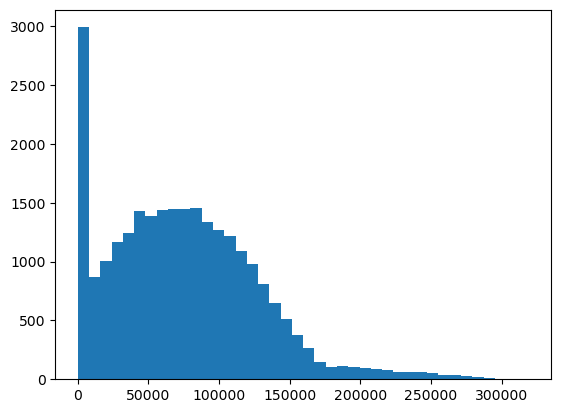

In [38]:
freq,ci,n=plt.hist(p_wage,bins=40)
freq,ci

,Wages Interval,No. of People
1,2.1367 - 7982.340032500001,2992.0
2,7982.340032500001 - 15962.543365000001,871.0
3,15962.543365000001 - 23942.746697500002,1005.0
4,23942.746697500002 - 31922.950030000004,1170.0
5,31922.950030000004 - 39903.15336250001,1242.0
6,39903.15336250001 - 47883.35669500001,1434.0
7,47883.35669500001 - 55863.56002750001,1385.0
8,55863.56002750001 - 63843.76336000001,1443.0
9,63843.76336000001 - 71823.96669250002,1444.0
10,71823.96669250002 - 79804.17002500001,1445.0


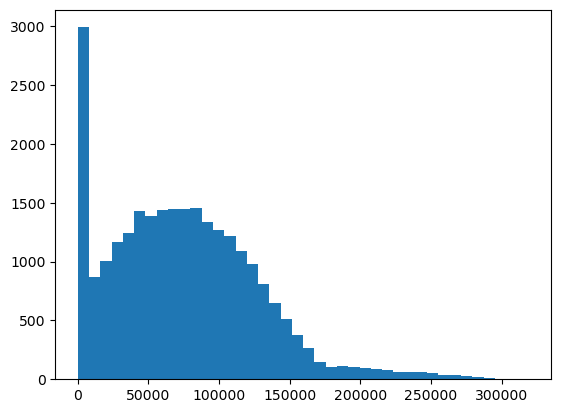

In [9]:
#Histogram Data frame
freq,ci,n = plt.hist(p_wage,bins=40)
ci_list = [f'{ci[i]} - {ci[i+1]}' for i in range(len(list(ci))) if i<len(list(ci))-1]
wages_df = pd.DataFrame(zip(ci_list,freq),columns=['Wages Interval','No. of People'],index=[i for i in range(1,41)])
wages_df


/Users/jagathyrav/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Users/jagathyrav/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Users/jagathyrav/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


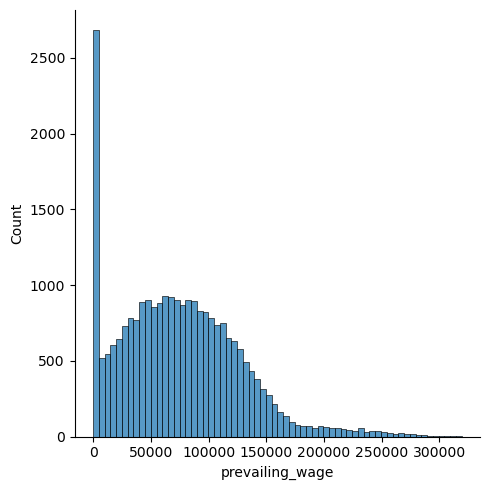

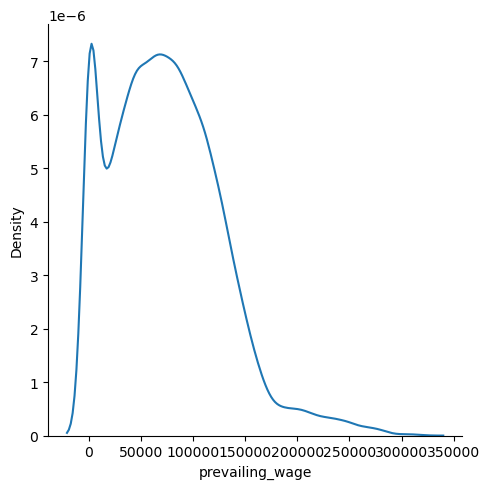

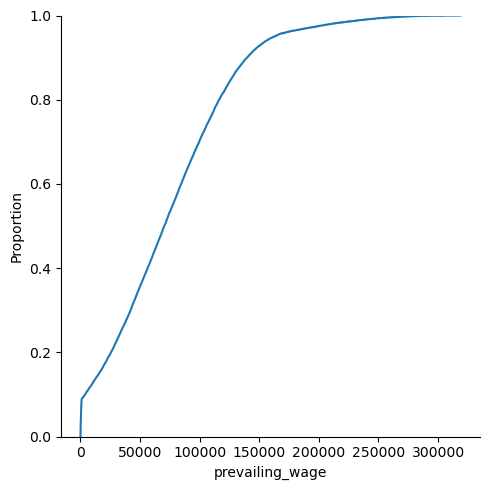

In [17]:
sns.displot(p_wage)  #Histogram  using seaborn package.
sns.displot(p_wage,kind='kde') #Kernel density EStimation
sns.displot(p_wage,kind='ecdf') #Cumulative Distribution plot

<Axes: >

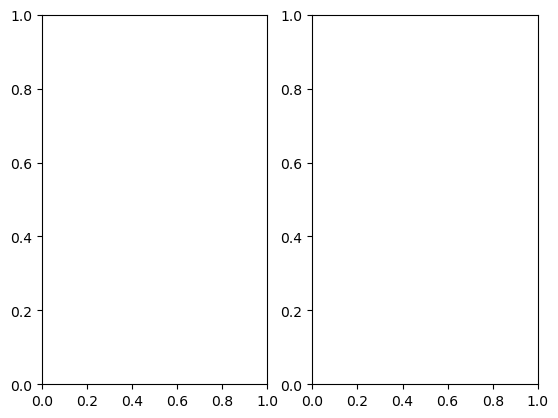

In [21]:
#subplot
plt.subplot(1,2,1)
plt.subplot(1,2,2)


/var/folders/_8/s82plxn96wd3_592npkh1_k80000gn/T/ipykernel_6754/3091423120.py:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,2,2)


<Axes: >

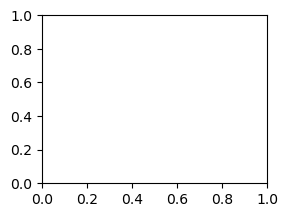

In [19]:
plt.subplot(2,1,1)
plt.subplot(2,2,2)

(array([  164.,   341.,   522.,   705.,   601.,   836.,   977.,  1818.,
         5424., 14092.]),
 array([1800. , 1821.6, 1843.2, 1864.8, 1886.4, 1908. , 1929.6, 1951.2,
        1972.8, 1994.4, 2016. ]),
 <BarContainer object of 10 artists>)

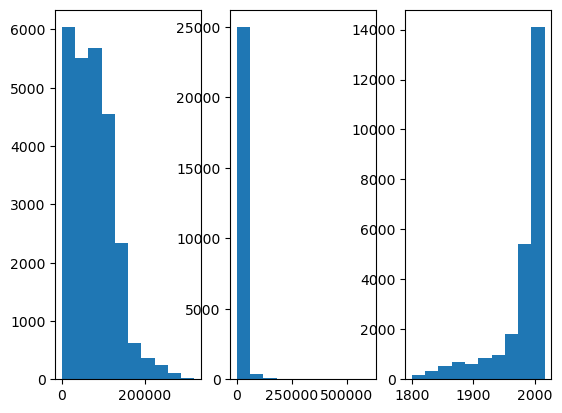

In [30]:
plt.subplot(1,3,1)
plt.hist(p_wage)
plt.subplot(1,3,2)
plt.hist(visa_df['no_of_employees'])
plt.subplot(1,3,3)
plt.hist(visa_df['yr_of_estab'])